### Assumesion 
- no unseen lable in test set, encoding, imputing

### Preprocessing
- big data?
- website
- cluster?

### Feature Engineering
- dimension reduction
- combination of preprocessing

### Discuss
- encoding & imputing delemma
- use X_test for feature engineering
- interpretion
- fairness
- NN attack

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Tools

In [2]:
#plot model evaluation metrics
from evaluation import *

#pre-processing pipe line functions
from pre_processing import *

#random search regression models
from regressors import *

## Datasets

In [3]:
#data sets
DATA_PATH = 'dataset/'
OUTPUT_PATH = 'output/'
FILE_NAME = 'crime_prep.csv'

data = pd.read_csv(DATA_PATH+FILE_NAME, header=0)
X = data.iloc[:,1:]
y = data.iloc[:,0]

#split to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#create df used for exploration
df = pd.concat((X_train, y_train),axis=1)
df_test = pd.concat((X_test, y_test),axis=1)

In [4]:
df.head()

,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,...,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126,target
482,21,NaN,NaN,Paducahcity,3,0.03,0.24,0.41,0.67,0.02,...,0.05,0.13,0.04,NaN,NaN,NaN,NaN,0.0,NaN,0.69
842,6,NaN,NaN,Newarkcity,5,0.04,0.70,0.08,0.52,0.98,...,0.04,0.23,0.19,NaN,NaN,NaN,NaN,0.0,NaN,0.33
372,55,25.0,78600.0,SunPrairiecity,2,0.01,0.48,0.01,0.98,0.03,...,0.02,0.18,0.01,NaN,NaN,NaN,NaN,0.0,NaN,0.03
576,42,41.0,44832.0,LowerAllentownship,3,0.01,0.41,0.11,0.89,0.09,...,0.03,0.12,0.06,NaN,NaN,NaN,NaN,0.0,NaN,0.04
211,54,NaN,NaN,Viennacity,2,0.00,0.31,0.01,0.99,0.03,...,0.01,0.24,0.04,NaN,NaN,NaN,NaN,0.0,NaN,0.01


In [5]:
df.describe()

,v_cont_0,v_cat_0,v_cat_1,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,v_cont_9,v_cont_10,...,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126,target
count,1395.000000,569.000000,566.000000,1395.000000,1395.000000,1395.000000,1395.00000,1395.000000,1395.000000,1395.000000,...,1395.000000,1395.000000,1395.000000,232.000000,232.000000,232.000000,232.000000,1395.000000,232.000000,1395.000000
mean,29.021505,56.811951,46092.568905,5.547670,0.058824,0.462674,0.18119,0.753821,0.149412,0.145398,...,0.065491,0.234882,0.160523,0.165000,0.073750,0.690043,0.443966,0.098308,0.193017,0.239806
std,16.325802,117.385297,24992.131533,2.874913,0.126493,0.163802,0.25422,0.244787,0.200142,0.235379,...,0.107911,0.202514,0.223613,0.218658,0.128929,0.224498,0.412319,0.244727,0.154747,0.233539
min,1.000000,1.000000,100.000000,1.000000,0.000000,0.030000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,9.000000,25365.000000,3.000000,0.010000,0.350000,0.02000,0.630000,0.040000,0.020000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.627500,0.000000,0.000000,0.110000,0.070000
50%,34.000000,23.000000,48055.000000,6.000000,0.020000,0.440000,0.06000,0.850000,0.070000,0.040000,...,0.040000,0.180000,0.070000,0.075000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,42.000000,61.000000,65676.000000,8.000000,0.060000,0.540000,0.24000,0.940000,0.160000,0.160000,...,0.070000,0.290000,0.190000,0.190000,0.060000,0.840000,1.000000,0.000000,0.220000,0.340000
max,56.000000,830.000000,94597.000000,10.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.990000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 482 to 684
Columns: 128 entries, v_cont_0 to target
dtypes: float64(125), int64(2), object(1)
memory usage: 1.4+ MB


## Data Exploration

In [7]:
#get all missing data
def get_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing', '%'])
    return missing_data

#heatmap of all features
def show_correlation(df):
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat);
    plt.show()

#target correlation matrix
def show_top_related(df, target, k):
    corrmat = df.corr()
    cols = corrmat.nlargest(k, target)[target].index
    cm = np.corrcoef(df[cols].values.T)
    plt.figure(figsize=(12,9))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    return cols

#scatterplot of most related features
def show_pair_plot(df):
    sns.set()
    sns.pairplot(df, height = 2)
    plt.show();

#histogram and normal probability plot
def show_distribution(df, target):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[target], fit=norm);
    plt.subplot(122)
    res = stats.probplot(df[target], plot=plt)
    plt.show()

#boxplot of category feature and target    
def show_cat_relation(df, cat, target):
    concat = pd.concat([df[target], df[cat]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=cat, y=target, data=concat)    
    plt.show()

#scatter plot of category feature and target    
def show_num_relation(df, num, target):
    data = pd.concat([df[target], df[num]], axis=1)
    data.plot.scatter(x=num, y=target);
    plt.show()

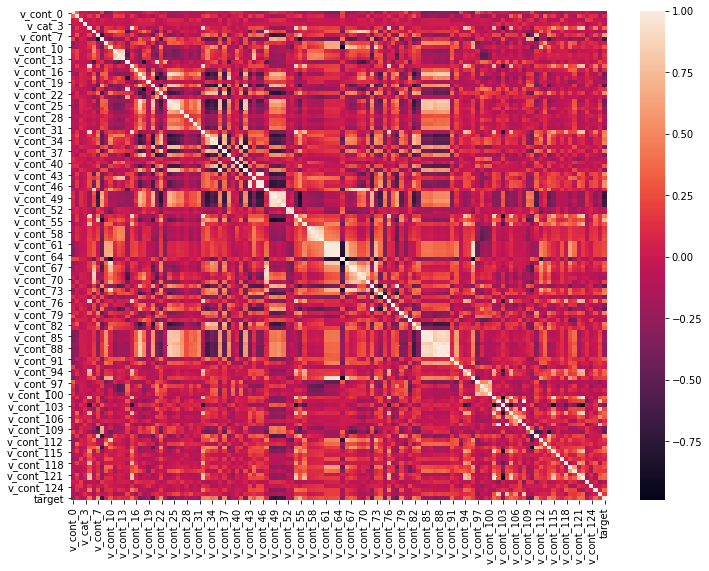

In [8]:
show_correlation(df)

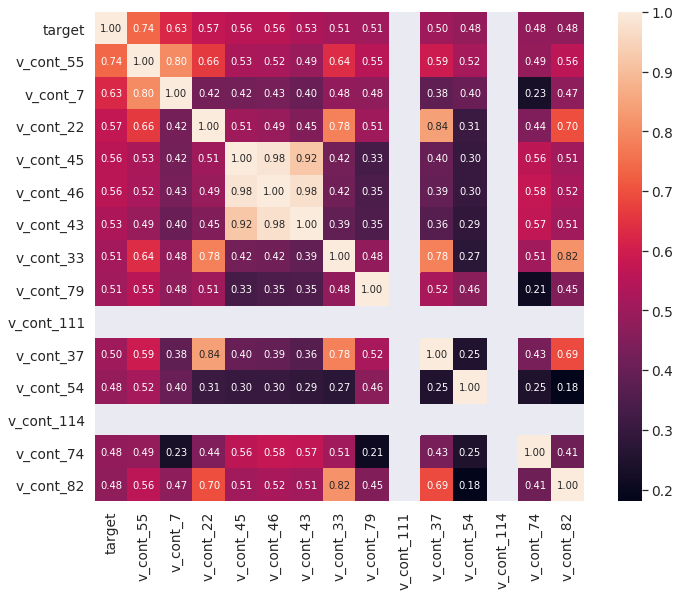

In [9]:
cols = show_top_related(df, 'target', k=15)

In [10]:
# show_pair_plot(df[cols[:10]])

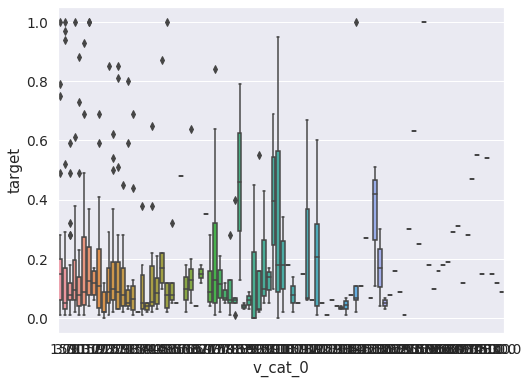

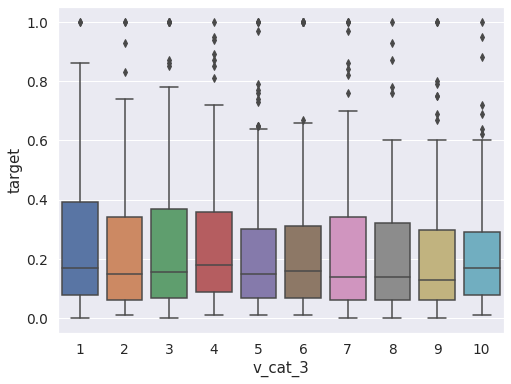

In [11]:
show_cat_relation(df, 'v_cat_0', 'target')
show_cat_relation(df, 'v_cat_3', 'target')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


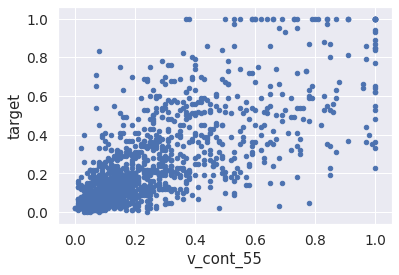

In [12]:
show_num_relation(df, 'v_cont_55', 'target')

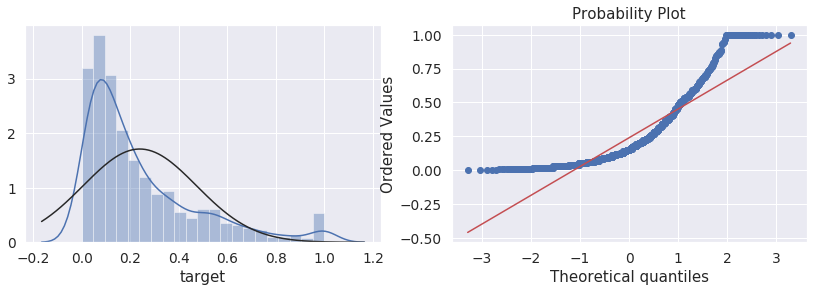

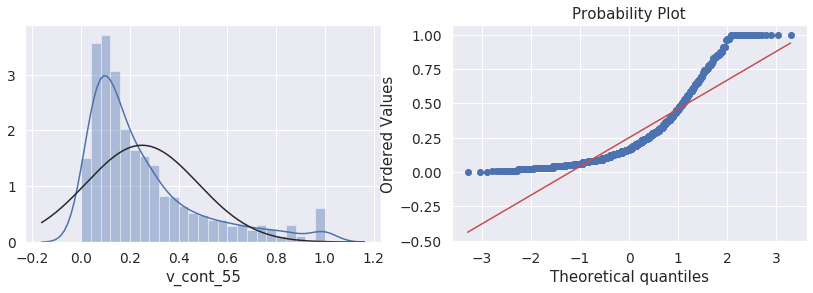

In [13]:
show_distribution(df, 'target')
show_distribution(df, 'v_cont_55')

Normalized to gaussion distribution


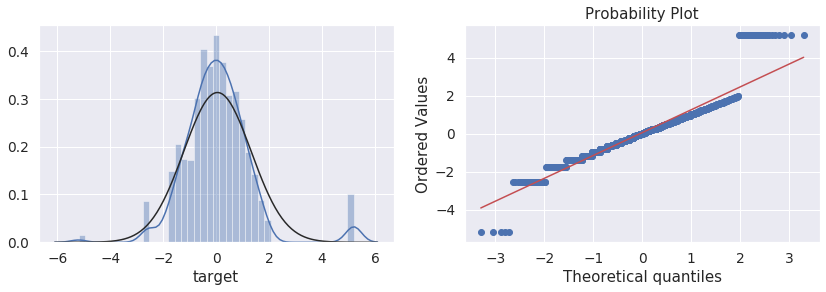

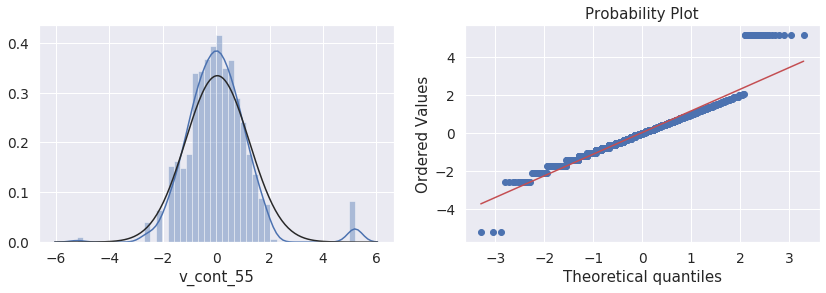

In [14]:
gau, _ = gaussion_normarlize(df[cols], df[cols])
show_distribution(gau, 'target'), show_distribution(gau, 'v_cont_55');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


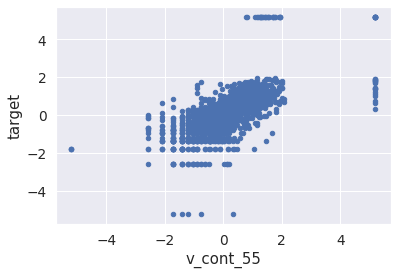

In [15]:
show_num_relation(gau, 'v_cont_55', 'target')

In [16]:
missing_data = get_missing_data(df)
missing_data.head(30)

,Missing,%
v_cont_103,1163,0.833692
v_cont_113,1163,0.833692
v_cont_126,1163,0.833692
v_cont_101,1163,0.833692
v_cont_102,1163,0.833692
v_cont_104,1163,0.833692
v_cont_105,1163,0.833692
v_cont_106,1163,0.833692
v_cont_107,1163,0.833692
v_cont_108,1163,0.833692


## Feature Engineering

In [17]:
class Pipeline:
    #take a dictionary with function as key and functions' parameters as value
    def __init__(self, transformers):
        self.transformers = transformers
        self.regressors = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    #make prediction and store all estimators and precessed dataset
    #see pre_processing.py, regressors.py and evaluation.py
    def predict(self, x_train, y_train, x_test, y_test):
        x_train, x_test = x_train, x_test
        for trans in self.transformers:
            params = self.transformers[trans]
            if params == None:
                x_train, x_test = trans(x_train, x_test)
            else:
                x_train, x_test = trans(x_train, x_test, params)
        
        all_regrs, regr_names = run_all_regrs(x_train, y_train, x_test, y_test)
        mse, r2 = evaluate_regression(x_train, y_train, x_test, y_test, all_regrs, regr_names, FILE_NAME, OUTPUT_PATH)
        self.regressors = all_regrs
        self.X_train = x_train
        self.X_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
#plot estimator score and x_train dimensions/features
def show_dimension_curve(estimator, x_train, y_train, x_test, y_test):
    scores = []
    for d in range(1,x_train.shape[1]+1):
        train, test = dimension_reduction(x_train, x_test, n_components=d, verbose=False)
        reg = estimator.fit(train, y_train)
        scores.append(reg.score(test, y_test))
    plt.title(str(estimator).split('(')[0])
    plt.xlabel('Dimension of X')
    plt.ylabel('R Square Score')
    plt.plot(np.arange(x_train.shape[1]), scores,)
    plt.show()

#### All Features

Encoding X features...
Imputed missing data with "most_frequent"
Standardized data with MinMaxScaler(copy=True, feature_range=(0, 1))
Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


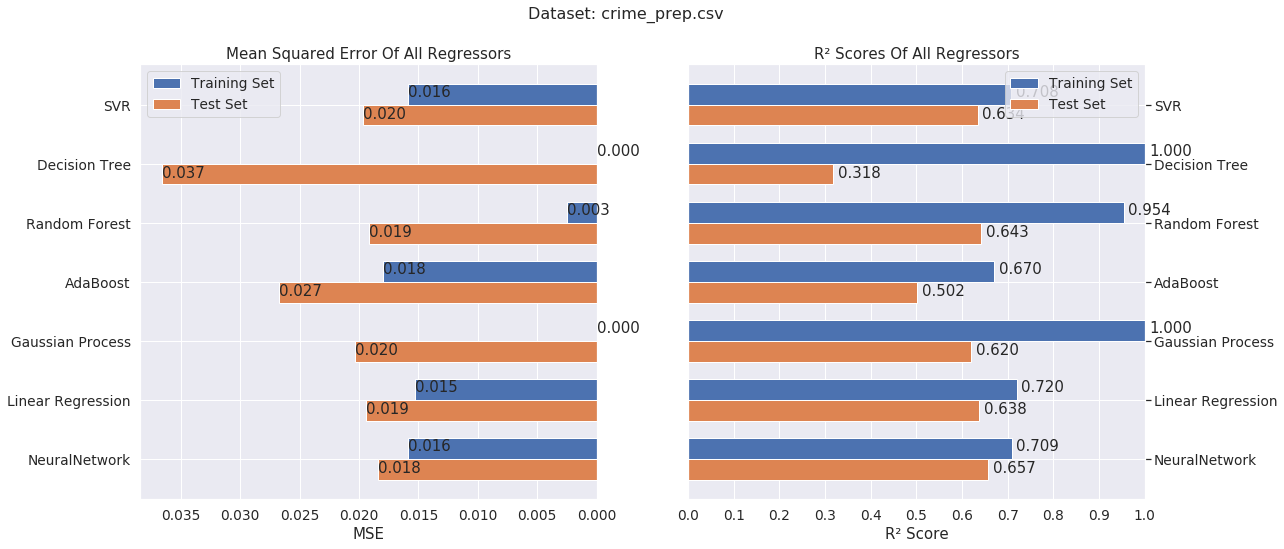

CPU times: user 37 s, sys: 748 ms, total: 37.7 s
Wall time: 48.3 s


In [18]:
%%time
model = Pipeline({encode_labels:None, 
                  impute_value:'most_frequent',
                  standardize_data:preprocessing.MinMaxScaler(),
                 })
model.predict(X_train, y_train, X_test, y_test)

#### 15-Dimension/Feature

Encoding X features...
Dropped 22 features
Imputed missing data with "most_frequent"
Standardized data with MinMaxScaler(copy=True, feature_range=(0, 1))
Reduce dimension form 105 to 15
Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


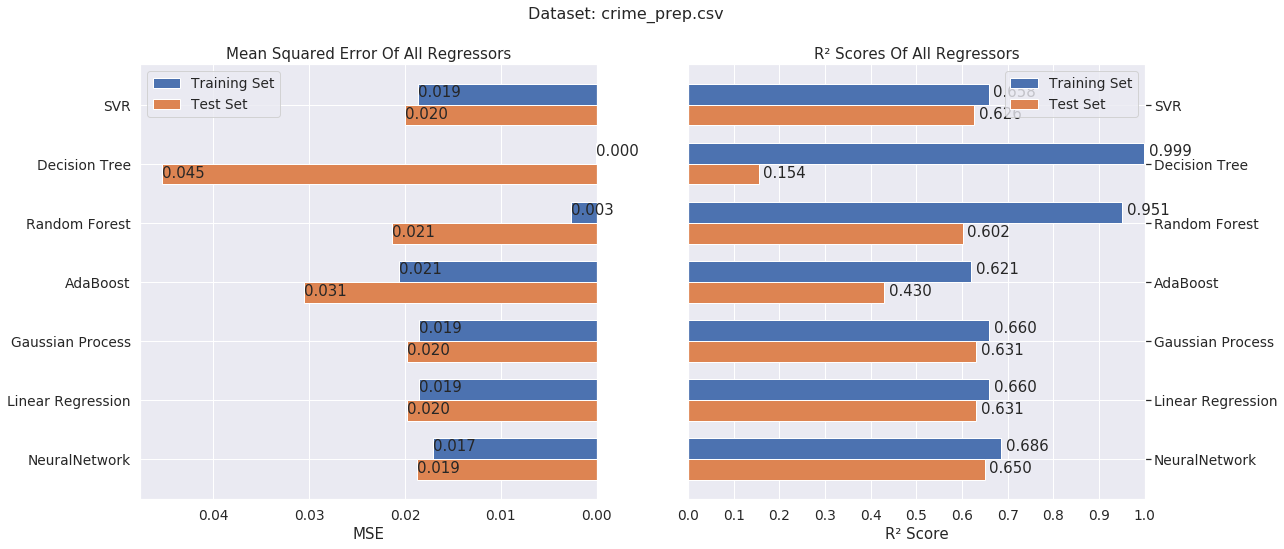

CPU times: user 15.7 s, sys: 380 ms, total: 16.1 s
Wall time: 14.9 s


In [19]:
%%time
model2 = Pipeline({encode_labels:None,
                   drop_features:0.8,
#                    impute_value:'mean',
                   impute_value:'most_frequent',
#                    standardize_data:preprocessing.StandardScaler(),
                   standardize_data:preprocessing.MinMaxScaler(),
#                    gaussion_normarlize:None,
                   dimension_reduction:15,
                 })
model2.predict(X_train, y_train, X_test, y_test)

#### Dimension Curves

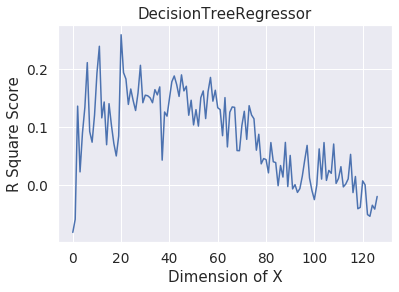

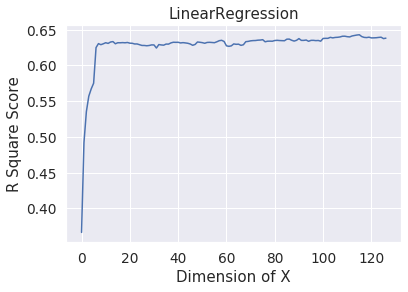

In [20]:
show_dimension_curve(model.regressors[1], model.X_train, model.y_train, model.X_test, model.y_test)
show_dimension_curve(model.regressors[5], model.X_train, model.y_train, model.X_test, model.y_test)

#### Hand-crafted Feature

Encoding X features...
Imputed missing data with "most_frequent"
Standardized data with MinMaxScaler(copy=True, feature_range=(0, 1))
Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


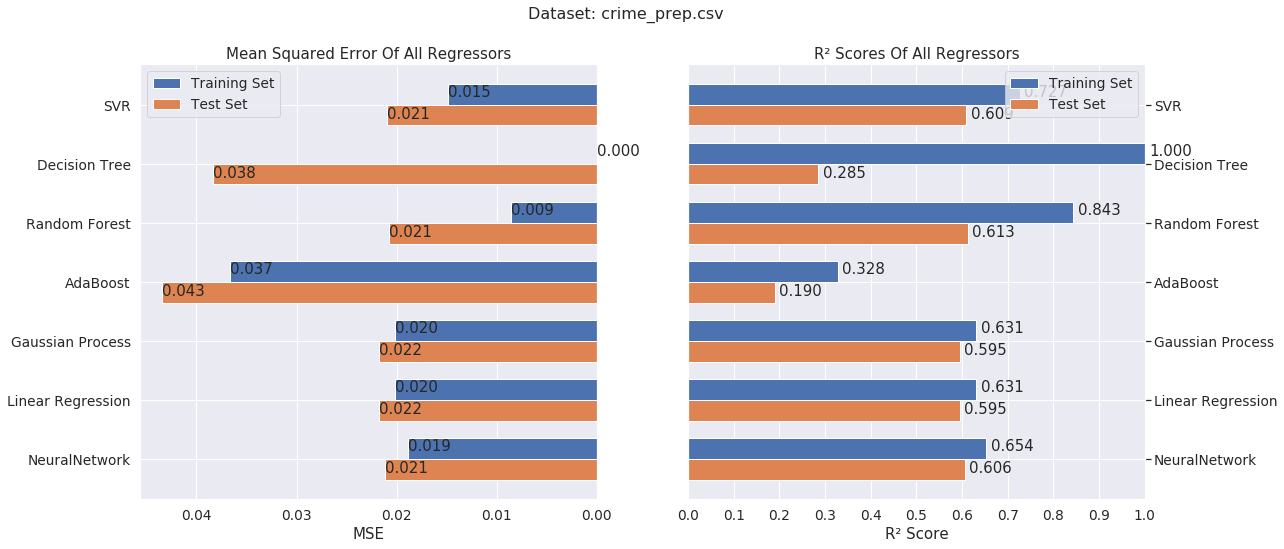

CPU times: user 11.5 s, sys: 388 ms, total: 11.9 s
Wall time: 12.1 s


In [21]:
%%time
model.predict(X_train[cols[1:]], y_train, X_test[cols[1:]], y_test)

## Model Explainability

In [22]:
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, get_dataset, info_plots
import shap

In [23]:
svr = model.regressors[0]
lr = model.regressors[5]
forest = model.regressors[2]
nn = model.regressors[6]
estimator = forest

#### Permutation Importance

In [24]:
perm = PermutationImportance(estimator, random_state=1).fit(model.X_test, model.y_test)
eli5.show_weights(perm, feature_names = model.X_test.columns.tolist())

Weight,Feature
0.3198 ± 0.0536,v_cont_55
0.0263 ± 0.0063,v_cont_74
0.0219 ± 0.0036,v_cont_7
0.0189 ± 0.0108,v_cont_45
0.0171 ± 0.0119,v_cont_54
0.0143 ± 0.0044,v_cont_33
0.0138 ± 0.0070,v_cont_22
0.0099 ± 0.0028,v_cont_82
0.0071 ± 0.0034,v_cont_37
0.0056 ± 0.0040,v_cont_46


#### Partial Dependence Plots
While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

In [25]:
def show_pdp(estimator, data, feature):
    pdp_target = pdp.pdp_isolate(model=estimator, dataset=data, model_features=data.columns.tolist(), feature=feature)
    pdp.pdp_plot(pdp_target, feature)
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


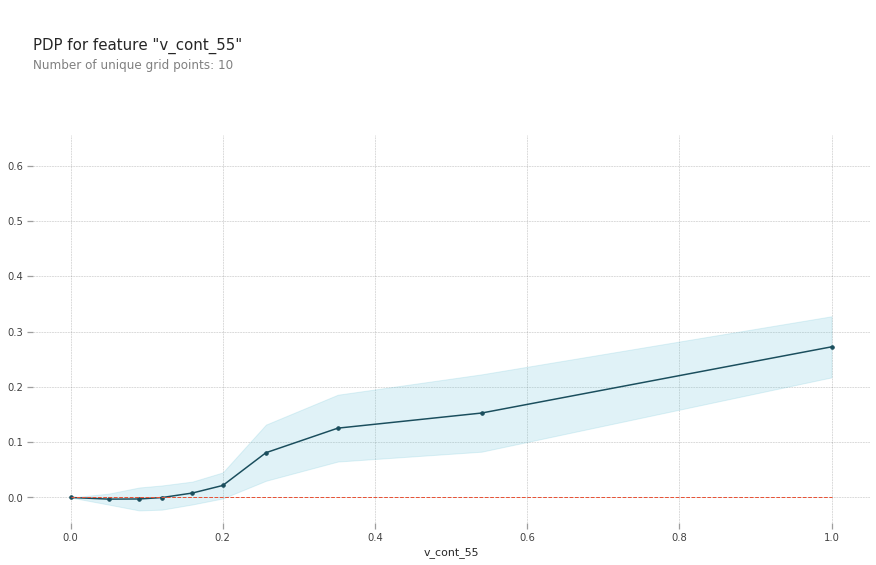

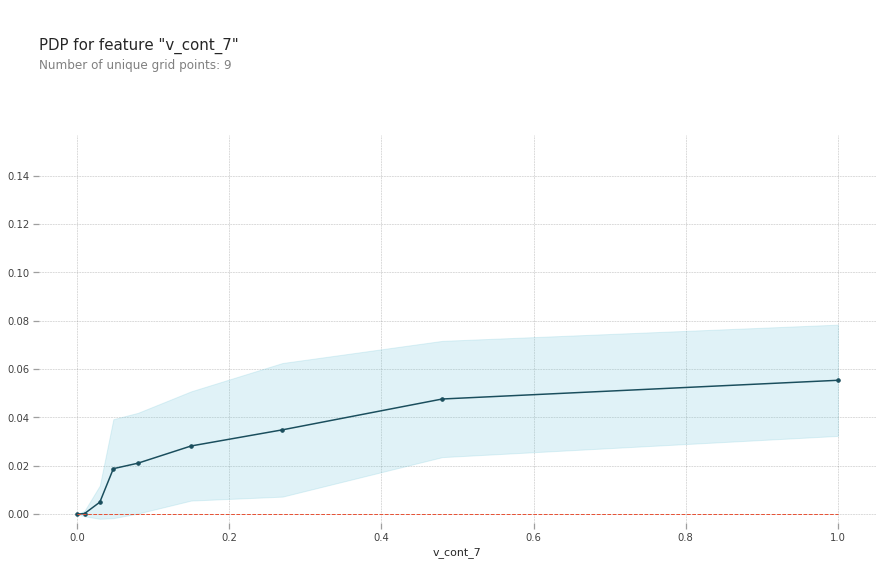

In [26]:
show_pdp(estimator, model.X_test, 'v_cont_55')
show_pdp(estimator, model.X_test, 'v_cont_7')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


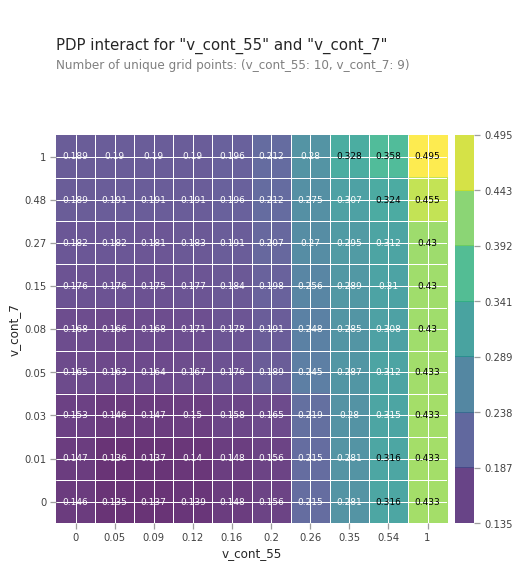

In [27]:
#2D Partial Dependence
features_to_plot = ['v_cont_55', 'v_cont_7']
inter1  =  pdp.pdp_interact(model=estimator, dataset=model.X_test, model_features=model.X_test.columns.tolist(), features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')
plt.show()

#### SHAP
SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In [28]:
row_to_show = 5
data_for_prediction = model.X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

#create object that can calculate shap values
explainer = shap.TreeExplainer(estimator)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

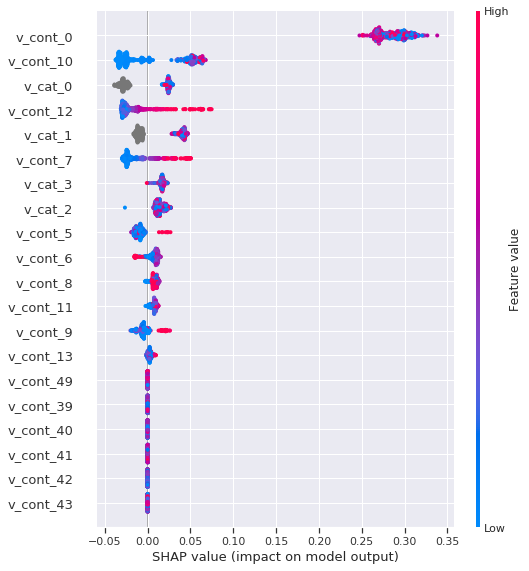

In [29]:
#calculate shap_values for all of X_test rather than a single row, to have more data for plot.
all_shap_values = explainer.shap_values(X_test)
shap.summary_plot(all_shap_values, X_test)